In [2]:
import cv2
import numpy as np
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from math import ceil
import time

from imutils.video import VideoStream

In [3]:
PIL_GRAYSCALE = 'L'
PIL_WIDTH_INDEX = 0
PIL_HEIGHT_INDEX = 1

In [4]:
CHARS = ['.', ',', '-', '~', ':', ';', '+', '*', '?', '%', '$', '#', '@']
resize_width = 200

In [5]:
def text_to_image(text_img):
    lines = text_img
    font = None
    font = ImageFont.load_default()

    # 글꼴과 선의 조합으로 충분한 크기의 배경 이미지를 생성
    font_points_to_pixels = lambda pt: round(pt * 96.0 / 72)
    margin_pixels = 20

    # 배경 이미지의 높이
    tallest_line = max(lines, key=lambda line: font.getsize(line)[PIL_HEIGHT_INDEX])
    max_line_height = font_points_to_pixels(font.getsize(tallest_line)[PIL_HEIGHT_INDEX])
    realistic_line_height = max_line_height * 0.8
    image_height = int(ceil(realistic_line_height * len(lines) + 2 * margin_pixels))

    # 배경 이미지의 너비
    widest_line = max(lines, key=lambda s: font.getsize(s)[PIL_WIDTH_INDEX])
    max_line_width = font_points_to_pixels(font.getsize(widest_line)[PIL_WIDTH_INDEX])
    image_width = int(ceil(max_line_width + (2 * margin_pixels)))

    # 배경이미지 생성
    background_color = 0  # white
    image = Image.new(PIL_GRAYSCALE, (image_width, image_height), color=background_color)
    draw = ImageDraw.Draw(image)

    # 텍스트의 라인 별로 그리기
    font_color = 255  # black
    horizontal_position = margin_pixels
    
    for i, line in enumerate(lines):
        vertical_position = int(round(margin_pixels + (i * realistic_line_height)))
        draw.text((horizontal_position, vertical_position), line, fill=font_color, font=font)

    return image

In [6]:
def ascii_art(img, debug=False):
    result_img = None
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = gray_img.shape
    new_height = int(h / w * resize_width)
    gray_img = cv2.resize(gray_img, (resize_width * 2, new_height))
    
    text_img = tuple()
    
    for row in gray_img:
        text_line = ""

        for pixel in row: 
            # pixel 0-255 -> CHARS 0-12
            index = int(pixel / 256 * len(CHARS))
            text_line = text_line + CHARS[index]

    #     print(text_line)
        text_img += (text_line,)

    pil_image = Image.fromarray(rgb_img, "RGB")
    ascii_image = text_to_image(text_img)


    pil_resize_image = pil_image.resize((int(pil_image.size[0]/6), int(pil_image.size[1]/6)))
    ascii_resize_image = ascii_image.resize((int(ascii_image.size[0]/3), int(ascii_image.size[1]/3)))

    new_image = Image.new("RGB", (900, 900), (255, 255, 255))
    new_image.paste(pil_resize_image, (10, 10))
    new_image.paste(ascii_resize_image, (pil_resize_image.width + 20, 10))
    
    if debug:
        result_img = new_image
    else:
        result_img = ascii_image
    return result_img

이미지를 Grayscale로 변환  
이미지 Resize

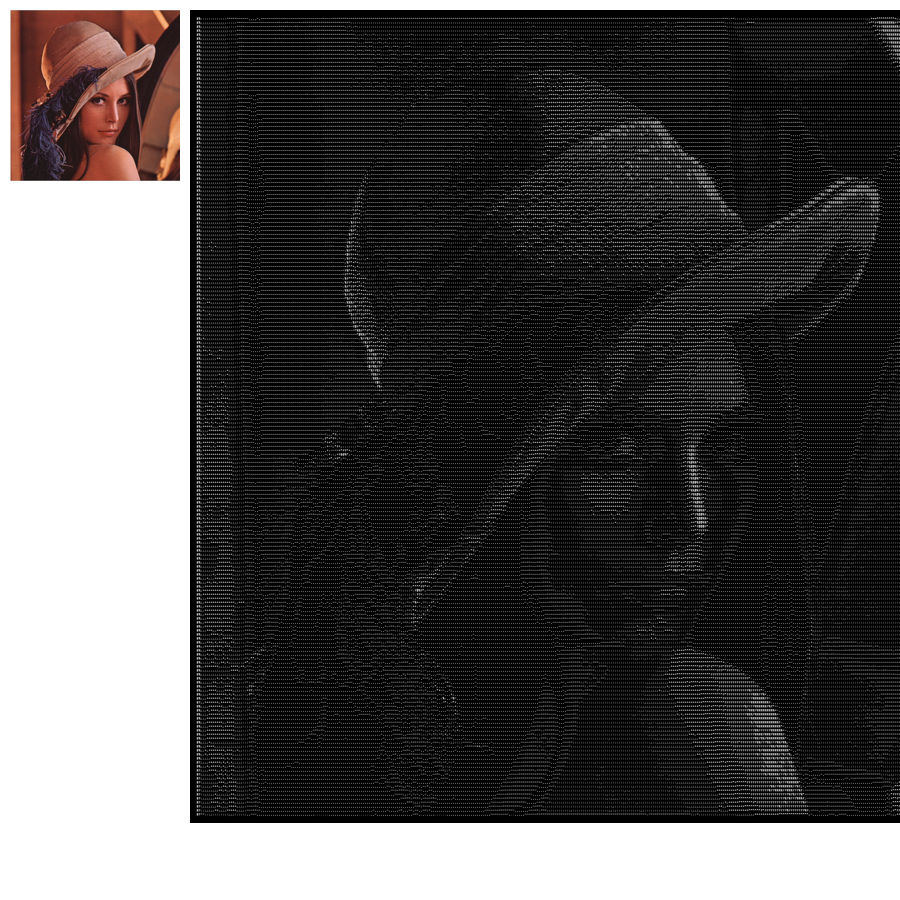

In [8]:
img = cv2.imread('assets/images/test_image.jpg')

ascii_art(img, debug=True)

In [22]:
# video = "kids.mp4"
video = ""

if video:
    vs = cv2.VideoCapture(video)
else:
    vs = VideoStream(src=0).start()
    time.sleep(1.0)

while True:
    frame = vs.read()
    frame = frame[1] if video else frame
    
    if frame is None:
        break
        
    ascii_img = ascii_art(frame, debug=True)
    ascii_cv_img = np.asarray(ascii_img)
    ascii_cv_bgr_img = cv2.cvtColor(ascii_cv_img, cv2.COLOR_RGB2BGR)
    
    cv2.imshow("ASCII ART", ascii_cv_bgr_img)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        cv2.destroyAllWindows()
        break
        
if video:
    vs.release()
else:
    vs.stop()

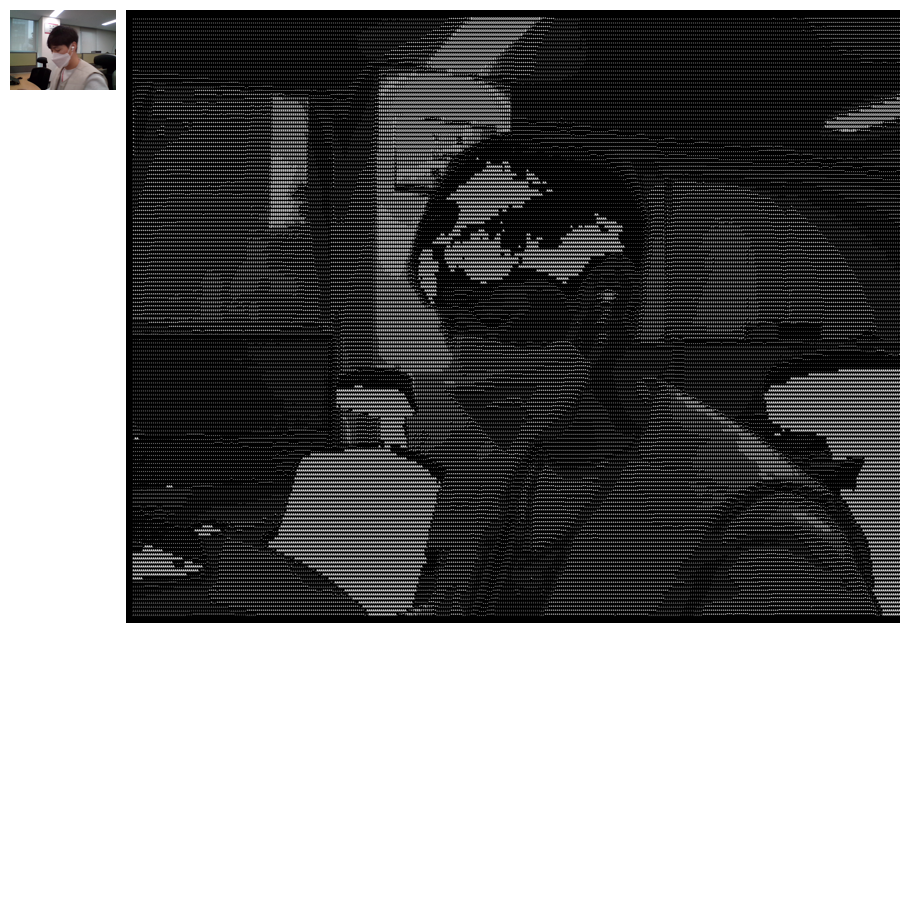

In [21]:
ascii_img